# Customer Churn Analysis
This notebook includes data loading, cleaning, and EDA.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"D:\Ashish Workshop\All data\Project002\Customer_Churn_Dataset.csv")
df.head()

,customer_id,gender,senior_citizen,tenure_months,contract_type,monthly_charges,payment_method,internet_service,online_security,tech_support,is_active,churn,total_charges
0,1,Male,0,51.0,Month-to-Month,903.08,Credit Card,Fiber,No,No,No,No,46057.08
1,2,Female,0,70.0,Month-to-Month,778.40,Debit Card,DSL,Yes,Yes,Yes,Yes,54488.00
2,3,Male,1,6.0,One Year,475.65,UPI,DSL,No,No,Yes,No,2853.90
3,4,Male,0,67.0,Month-to-Month,741.04,UPI,Fiber,No,No,Yes,No,49649.68
4,5,Male,0,7.0,Two Year,381.81,UPI,Fiber,Yes,No,Yes,No,2672.67


## Data Cleaning

In [3]:
# df.info()
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
tenure_months        6
contract_type        0
monthly_charges      4
payment_method       0
internet_service    54
online_security      0
tech_support         0
is_active            0
churn                0
total_charges        4
dtype: int64

In [4]:
df['monthly_charges'] = df['monthly_charges'].fillna(df['monthly_charges'].mean())
df['tenure_months'] = df['tenure_months'].fillna(df['tenure_months'].median())
df['total_charges'] = df['total_charges'].fillna(df['total_charges'].mode()[0])

df['internet_service'] = df['internet_service'].fillna('Unknown')

df.isnull().sum()


customer_id         0
gender              0
senior_citizen      0
tenure_months       0
contract_type       0
monthly_charges     0
payment_method      0
internet_service    0
online_security     0
tech_support        0
is_active           0
churn               0
total_charges       0
dtype: int64

In [5]:
df['churn_flag'] = df['churn'].map({'Yes':1, 'No':0})
df['is_active_flag'] = df['is_active'].map({'Yes':1, 'No':0})
df.head()

,customer_id,gender,senior_citizen,tenure_months,contract_type,monthly_charges,payment_method,internet_service,online_security,tech_support,is_active,churn,total_charges,churn_flag,is_active_flag
0,1,Male,0,51.0,Month-to-Month,903.08,Credit Card,Fiber,No,No,No,No,46057.08,0,0
1,2,Female,0,70.0,Month-to-Month,778.40,Debit Card,DSL,Yes,Yes,Yes,Yes,54488.00,1,1
2,3,Male,1,6.0,One Year,475.65,UPI,DSL,No,No,Yes,No,2853.90,0,1
3,4,Male,0,67.0,Month-to-Month,741.04,UPI,Fiber,No,No,Yes,No,49649.68,0,1
4,5,Male,0,7.0,Two Year,381.81,UPI,Fiber,Yes,No,Yes,No,2672.67,0,1


## EDA

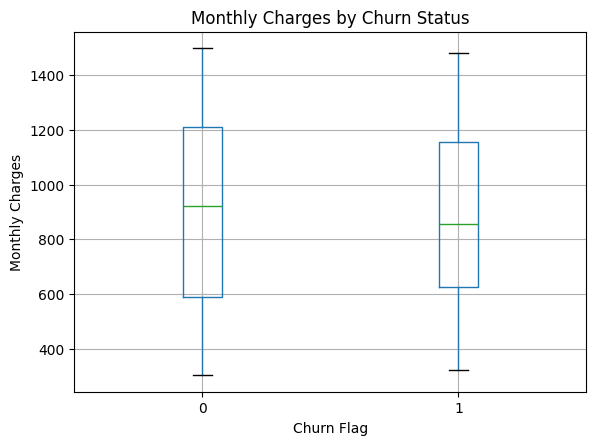

In [ ]:
df['churn_flag'].value_counts().plot(kind='bar')
plt.title("Churn Distribution")
plt.show()

df.groupby('payment_method')['churn_flag'].mean().plot(kind='bar')
plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.show()


df.boxplot(column='monthly_charges', by='churn_flag')
plt.title("Monthly Charges by Churn Status")
plt.suptitle('')
plt.xlabel("Churn Flag")
plt.ylabel("Monthly Charges")
plt.show()


In [7]:
df.to_csv(r"D:\Ashish Workshop\All data\Project002\Cleaned_Customer_Churn_Dataset.csv",index=False)